In [7]:
ENV["PYTHON"] = "/home/cd/anaconda3/bin/python"
using PyPlot
using DataFrames
using SparseArrays
using LinearAlgebra
using Statistics

mutable struct Coins
    n::Int64
    n_seq::Int64
    sequences::Array{String, 1}
    index::Dict{String,Int64}
    P::Matrix{Float64}
    probs::Matrix{Float64}
    wins::Matrix{Float64}
    stats::DataFrames.DataFrame
    
    function Coins(n::Int64)
        n_seq = 2^n
        sequences = fill("", n_seq)
        for i=1:n
            for j=1:n_seq
                sequences[j] = (j % 2^i) >= 2^(i-1) ? string(sequences[j], "T") : string(sequences[j], "H")
            end
        end
        sequences = sort(sequences)
        index = Dict(zip(sequences, 1:n_seq))
        P = -Matrix{Float64}(I, n_seq, n_seq)
        for seq in sequences
            P[index[seq], index[string(seq[2:end], "H")]] += 0.5
            P[index[seq], index[string(seq[2:end], "T")]] += 0.5
        end
        probs = zeros(n_seq, n_seq)
        wins = zeros(n_seq, n_seq)
        stats = DataFrame(seq=sequences)
        new(n, n_seq, sequences, index, P, probs, wins, stats)
    end
end

function battle(coins::Coins, s1::String, s2::String)
    if s1 == s2
        return 0.5
    else
        inds = filter(x -> !(x in [coins.index[s1], coins.index[s2]]), 1:(coins.n_seq))
        P = coins.P[inds, inds]
        y = -coins.P[inds, coins.index[s1]]
        return (sum(P\y) + 1) / (coins.n_seq)
    end
end

function battleAll(coins::Coins)
    coins.probs = reshape([round(battle(coins, coins.sequences[i], coins.sequences[j]), digits=2) 
            for i=coins.n_seq:-1:1, j=1:coins.n_seq], (coins.n_seq, coins.n_seq))
    coins.wins = reshape([coins.probs[i,j] > 0.5 ? 1.0 : coins.probs[i,j] < 0.5 ? 0 : 0.5  
            for i=1:coins.n_seq, j=1:coins.n_seq], (coins.n_seq, coins.n_seq))
    coins.stats[:probs] = round.(mean(coins.probs, 2)[:,1],3)
    coins.stats[:wins] = round.(mean(coins.wins, 2)[:,1],3)
end

function heatmap(coins::Coins, data::Matrix{Float64}, cm)
    plt[:pcolor](data, cmap=cm)
    ax = plt[:gca]()
    plt[:xticks]([-0.5+i for i=1:coins.n_seq], coins.sequences, rotation="vertical")
    plt[:yticks]([-0.5+i for i=1:coins.n_seq], reverse(coins.sequences), rotation="horizontal")
    ax[:xaxis][:set_tick_params](labeltop="on")
    plt[:colorbar]()
    plt[:show]()
end

heatmap (generic function with 1 method)

In [10]:
mean(coins.probs, 2)

MethodError: MethodError: objects of type Array{Float64,2} are not callable
Use square brackets [] for indexing an Array.

In [8]:
coins = Coins(3)
battleAll(coins)

MethodError: MethodError: objects of type Array{Float64,2} are not callable
Use square brackets [] for indexing an Array.

## Probabilities of winning

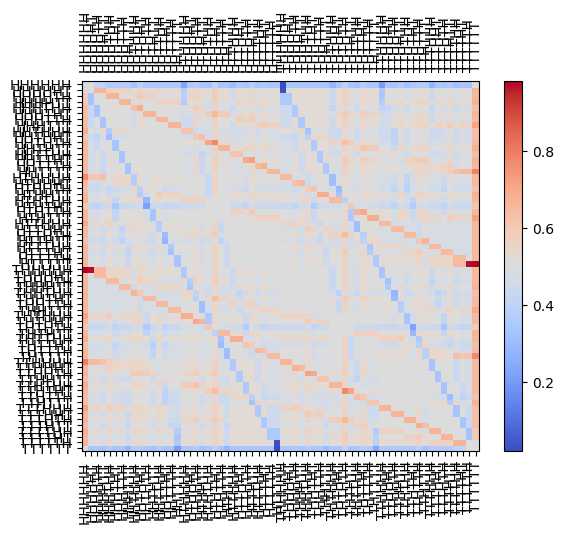

In [13]:
heatmap(coins, coins.probs, "coolwarm")

## Winnings

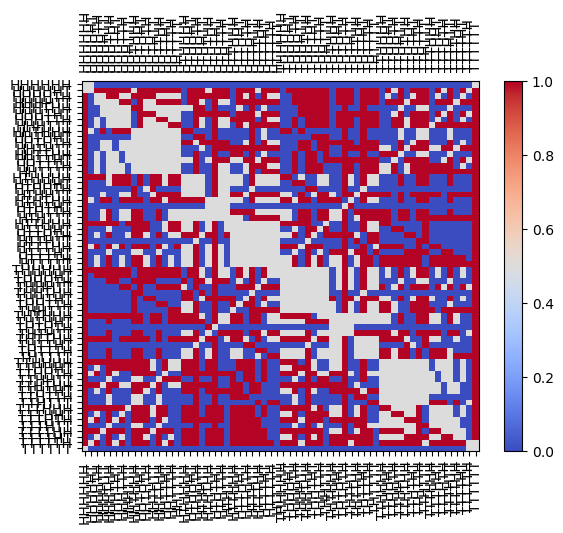

In [14]:
heatmap(coins, coins.wins, "coolwarm")

## Statistics

In [15]:
sort(coins.stats, cols=[:probs, :wins], rev=true)

,seq,probs,wins
1,HTTTTT,0.522,0.609
2,THHHHH,0.522,0.609
3,HHTTTT,0.519,0.578
4,TTHHHH,0.519,0.578
5,HTHHTT,0.518,0.672
6,THTTHH,0.518,0.672
7,HHHTHT,0.518,0.664
8,HHHTTT,0.518,0.664
9,TTTHHH,0.518,0.664
10,TTTHTH,0.518,0.664


In [16]:
sort(coins.stats, cols=[:wins], rev=true)

,seq,probs,wins
1,HHHHHT,0.516,0.797
2,TTTTTH,0.516,0.797
3,HHHHTT,0.517,0.742
4,TTTTHH,0.517,0.742
5,HTHHTT,0.518,0.672
6,THTTHH,0.518,0.672
7,HHHTHT,0.518,0.664
8,HHHTTT,0.518,0.664
9,TTTHHH,0.518,0.664
10,TTTHTH,0.518,0.664


In [ ]:
Âµ